In [67]:
from typing import List, Dict, Tuple

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

__WORKING_BRANCH_PATH = (
    "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch"
)

hatch = {
    'Vector': '////',
    'Skiplist': 'OO',
    'Hashskiplist': '....',
    'Hashlinklist': '---'
}

linestyle = {
    'Vector': '-',
    'Skiplist': '-',
    'Hashskiplist': '-.',
    'Hashlinklist': '..'
}

color = {
    'Vector': 'darkslateblue',
    'Skiplist': 'olive',
    'Hashskiplist': 'darkred',
    'Hashlinklist': 'steelblue'
    # 'Vector': 'black',
    # 'Skip': 'black',
    # 'HashSkipList': 'black',
    # 'HashLinkList': 'black'
}

plt.rcParams["font.family"] = "Arial", "Gulasch", "Times", "Times New Roman", "serif"

alphabets = "abcdefghijklmnopqrstuvwxyz"

In [3]:
def get_exp_dirname(query_type: str, selectivity: float, entry_size: int) -> str:
    return (
        f"{__WORKING_BRANCH_PATH}/experiments-{query_type}-{selectivity}-{entry_size}"
    )


def get_log_file_path(
    query_type: str,
    inserts: int,
    point_queries: int,
    range_queries: int,
    selectivity: float,
    memtable: str,
    entry_size: int,
    number_of_entries_per_page: int,
    number_of_pages: int,
    prefixlen: int = 0,
    bucket_count: int = 0,
    size_ratio: int = 4,
    updates: int = 0,
):
    if memtable.lower() in ("hashskiplist", "hashlinklist"):
        return f"{get_exp_dirname(query_type, selectivity, entry_size)}/I {inserts} U {updates} S {range_queries} Y {selectivity} Q {point_queries} m {memtable.lower()} E {entry_size} B {number_of_entries_per_page} P {number_of_pages} T {size_ratio} l {prefixlen} bucket_count {bucket_count}/workload.log"
    return f"{get_exp_dirname(query_type, selectivity, entry_size)}/I {inserts} U {updates} S {range_queries} Y {selectivity} Q {point_queries} m {memtable.lower()} E {entry_size} B {number_of_entries_per_page} P {number_of_pages} T {size_ratio}/workload.log"

In [4]:
def plot_single_comparison(
    memdf1: pd.DataFrame, memdf2: pd.DataFrame, labels: List[str], num: int = 0
):

    fig_size = (15, 6)

    if num == 0:
        num = len(memdf1)

    fig, ax = plt.subplots(figsize=fig_size)
    ax.plot(
        memdf1.index[:num],
        memdf1["TimeTaken"][:num], #  / 1000,
        color=color[labels[0].capitalize()],
        label=labels[0].lower(),
        alpha=0.7,
    )
    ax.plot(
        memdf2.index[:num],
        memdf2["TimeTaken"][:num], #  / 1000,
        color=color[labels[1].split()[0].capitalize()],
        label=labels[1].lower(),
        alpha=0.7,
    )
    ax.set_xlabel("insert query number")
    ax.set_ylabel("latency (ms)")
    ax.set_ylim(bottom=0)
    # ax.set_yscale("log")
    ax.legend()
    plt.show()

In [5]:
def plot_subplots_comparison(
    list_memdf1: List[pd.DataFrame],
    list_memdf2: List[pd.DataFrame],
    labels: List[str],
    titles: List[str],
    annotatepos: List[Dict[str, str]],
    num: int = 0,
):

    fig_size = (10, 3.5)

    if num == 0:
        num = len(list_memdf1[0])

    fig, ax = plt.subplots(2, 3, figsize=fig_size)

    for i in range(len(list_memdf1)):
        for j in range(len(list_memdf1[i])):
            ax[i, j].plot(
                list_memdf1[i].index[:num],
                list_memdf1[i]["TimeTaken"][:num] / 1000,
                color=color[labels[0].capitalize()],
                label=labels[0],
            )
            ax[i, j].plot(
                list_memdf2[i].index[:num],
                list_memdf2[i]["TimeTaken"][:num] / 1000,
                color=color[labels[1].capitalize()],
                label=labels[1],
            )
            ax[i, j].set_xlabel("insert query number")
            ax[i, j].set_ylabel("latency (ms)")
            ax[i, j].set_ylim(bottom=0)
            ax[i, j].set_title(f"$\mathbf{{(}}\mathbf{{{alphabets[i]}}}\mathbf{{)}}$ " + titles[i])
            x, y, step = annotatepos[i]["x"], annotatepos[i]["y"], annotatepos[i]["step"]
            ax[i, j].annotate(f"Avg time", xy=(x, y))
            ax[i, j].annotate(
                f"    {labels[0].lower()}: {(list_memdf1[i][:num]/1000).mean()['TimeTaken']:.2f} $\mathit{{m}}s$",
                xy=(x + 4, y - step),
            )
            ax[i, j].annotate(
                f"    {labels[1].lower()}: {(list_memdf2[i][:num]/1000).mean()['TimeTaken']:.2f} $\mathit{{m}}s$",
                xy=(x + 4, y - step * 2),
            )

            ax[i, j].legend()

    plt.show()

In [6]:
def prepare_dataframe(log_file_path: str, key: str="RangeQueryTime: ") -> pd.DataFrame:
    ff = open(log_file_path, "r")
    range_quereis = []

    for line in ff.readlines():
        if key in line:
            range_quereis.append(float(line.split(" ")[1]))
    
    return pd.DataFrame(range_quereis, columns=["TimeTaken"])


findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not fo

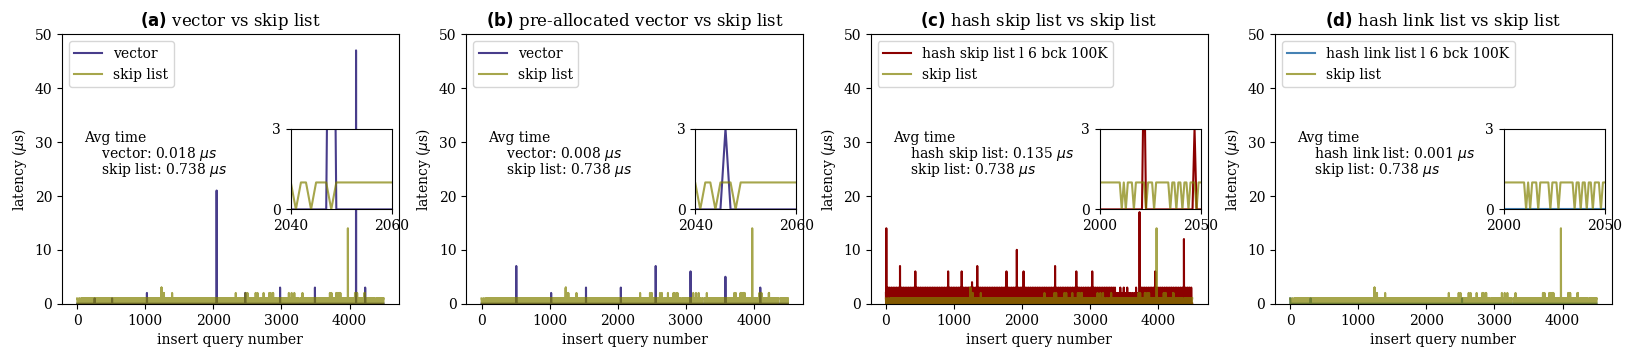

In [120]:
query_type = "IN"
entry_size = 64
memtables = ["Vector", "SkipList", "Hashskiplist", "Hashlinklist"]
inserts = 140000
point_queries = 0
range_queries = 0
number_of_entries_per_page = 64
number_of_pages = 4096
updates = 0
prefixlen = 6
bucket_count = 100000

selectivities = [0]
list_memdf1 = []
list_memdf2 = []
titles = []

for selectivity in selectivities:
    vec_logfile = get_log_file_path(
        query_type,
        inserts,
        point_queries,
        range_queries,
        selectivity,
        memtables[0],
        entry_size,
        number_of_entries_per_page,
        number_of_pages,
        prefixlen,
        bucket_count,
    )

    skip_logfile = get_log_file_path(
        query_type,
        inserts,
        point_queries,
        range_queries,
        selectivity,
        memtables[1],
        entry_size,
        number_of_entries_per_page,
        number_of_pages,
        prefixlen,
        bucket_count,
    )

    hash_skip_logfile = get_log_file_path(
        query_type,
        inserts,
        point_queries,
        range_queries,
        selectivity,
        memtables[2],
        entry_size,
        number_of_entries_per_page,
        number_of_pages,
        prefixlen,
        bucket_count,
    )

    hash_link_logfile = get_log_file_path(
        query_type,
        inserts,
        point_queries,
        range_queries,
        selectivity,
        memtables[3],
        entry_size,
        number_of_entries_per_page,
        number_of_pages,
        prefixlen,
        bucket_count,
    )

    vecdf_preallocated = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-INC-0-64/I 140000 U 0 S 0 Y 0 Q 0 m vector E 64 B 64 P 4096 T 4/workload.log"

    vecdf = prepare_dataframe(vec_logfile, "InsertTime: ")
    vecdf_preallocated = prepare_dataframe(vecdf_preallocated, "InsertTime: ")
    skipdf = prepare_dataframe(skip_logfile, "InsertTime: ")
    hash_skipdf = prepare_dataframe(hash_skip_logfile, "InsertTime: ")
    hash_linkdf = prepare_dataframe(hash_link_logfile, "InsertTime: ")

    # list_memdf1.append(memdf1)
    # list_memdf2.append(memdf2)
    # titles.append(f"selectivity {selectivity}")

    # plot_single_comparison(memdf1, memdf2, ['Vector', f'Skiplist'], 10000)

# annotatepos = [
#     {"x": 104, "y": 23, "step": 5},
#     {"x": 104, "y": 140, "step": 22},
# ]

fig, ax = plt.subplots(1, 4, figsize=(20, 3.5))

start = 0
end = 4500

ax[0].plot(
    vecdf.index[start:end+1],
    vecdf["TimeTaken"][start:end+1],
    color=color["Vector"],
    label="vector",
)

ax[0].plot(
    skipdf.index[start:end+1],
    skipdf["TimeTaken"][start:end+1],
    color=color["Skiplist"],
    label="skip list",
    alpha=0.7,
)

axins = inset_axes(ax[0], width="30%", height="30%", loc='right')
axins.plot(
    vecdf.index[start:end+1],
    vecdf["TimeTaken"][start:end+1],
    color=color["Vector"],
)
axins.plot(
    skipdf.index[start:end+1],
    skipdf["TimeTaken"][start:end+1],
    color=color["Skiplist"],
    alpha=0.7,
)

axins.set_xlim(2040, 2060)
axins.set_ylim(0, 3)

axins.set_xticks([2040, 2060])
axins.set_yticks([0, 3])

ax[1].plot(
    vecdf_preallocated.index[start:end+1],
    vecdf_preallocated["TimeTaken"][start:end+1],
    color=color["Vector"],
    label="vector",
)

ax[1].plot(
    skipdf.index[start:end+1],
    skipdf["TimeTaken"][start:end+1],
    color=color["Skiplist"],
    label="skip list",
    alpha=0.7,
)

axins1 = inset_axes(ax[1], width="30%", height="30%", loc='right')
axins1.plot(
    vecdf_preallocated.index[start:end+1],
    vecdf_preallocated["TimeTaken"][start:end+1],
    color=color["Vector"],
)
axins1.plot(
    skipdf.index[start:end+1],
    skipdf["TimeTaken"][start:end+1],
    color=color["Skiplist"],
    alpha=0.7,
)

axins1.set_xlim(2040, 2060)
axins1.set_ylim(0, 3)

axins1.set_xticks([2040, 2060])
axins1.set_yticks([0, 3])

ax[2].plot(
    hash_skipdf.index[start:end+1],
    hash_skipdf["TimeTaken"][start:end+1],
    color=color["Hashskiplist"],
    label=f"hash skip list l {prefixlen} bck {bucket_count//1000}K",
)

ax[2].plot(
    skipdf.index[start:end+1],
    skipdf["TimeTaken"][start:end+1],
    color=color["Skiplist"],
    label="skip list",
    alpha=0.7,
)

axins2 = inset_axes(ax[2], width="30%", height="30%", loc='right')
axins2.plot(
    hash_skipdf.index[start:end+1],
    hash_skipdf["TimeTaken"][start:end+1],
    color=color["Hashskiplist"],
)
axins2.plot(
    skipdf.index[start:end+1],
    skipdf["TimeTaken"][start:end+1],
    color=color["Skiplist"],
    alpha=0.7,
)

axins2.set_xlim(2000, 2050)
axins2.set_ylim(0, 3)

axins2.set_xticks([2000, 2050])
axins2.set_yticks([0, 3])

ax[3].plot(
    hash_linkdf.index[start:end+1],
    hash_linkdf["TimeTaken"][start:end+1],
    color=color["Hashlinklist"],
    label=f"hash link list l {prefixlen} bck {bucket_count//1000}K",
)

ax[3].plot(
    skipdf.index[start:end+1],
    skipdf["TimeTaken"][start:end+1],
    color=color["Skiplist"],
    label="skip list",
    alpha=0.7,
)

axins3 = inset_axes(ax[3], width="30%", height="30%", loc='right')
axins3.plot(
    hash_linkdf.index[start:end+1],
    hash_linkdf["TimeTaken"][start:end+1],
    color=color["Hashlinklist"],
)
axins3.plot(
    skipdf.index[start:end+1],
    skipdf["TimeTaken"][start:end+1],
    color=color["Skiplist"],
    alpha=0.7,
)

axins3.set_xlim(2000, 2050)
axins3.set_ylim(0, 3)

axins3.set_xticks([2000, 2050])
axins3.set_yticks([0, 3])

ax[0].annotate(f"Avg time", xy=(100, 30))
ax[0].annotate(
    f"    vector: {(vecdf['TimeTaken'][start:end+1]).mean():.3f} $\mathit{{\mu}}s$",
    xy=(104, 27),
)
ax[0].annotate(
    f"    skip list: {(skipdf['TimeTaken'][start:end+1]).mean():.3f} $\mathit{{\mu}}s$",
    xy=(104, 24),
)

ax[1].annotate(f"Avg time", xy=(100, 30))
ax[1].annotate(
    f"    vector: {(vecdf_preallocated['TimeTaken'][start:end+1]).mean():.3f} $\mathit{{\mu}}s$",
    xy=(104, 27),
)
ax[1].annotate(
    f"    skip list: {(skipdf['TimeTaken'][start:end+1]).mean():.3f} $\mathit{{\mu}}s$",
    xy=(104, 24),
)

ax[2].annotate(f"Avg time", xy=(100, 30))
ax[2].annotate(
    f"    hash skip list: {(hash_skipdf['TimeTaken'][start:end+1]).mean():.3f} $\mathit{{\mu}}s$",
    xy=(104, 27),
)
ax[2].annotate(
    f"    skip list: {(skipdf['TimeTaken'][start:end+1]).mean():.3f} $\mathit{{\mu}}s$",
    xy=(104, 24),
)

ax[3].annotate(f"Avg time", xy=(100, 30))
ax[3].annotate(
    f"    hash link list: {(hash_linkdf['TimeTaken'][start:end+1]).mean():.3f} $\mathit{{\mu}}s$",
    xy=(104, 27),
)
ax[3].annotate(
    f"    skip list: {(skipdf['TimeTaken'][start:end+1]).mean():.3f} $\mathit{{\mu}}s$",
    xy=(104, 24),
)

titles = ["vector vs skip list", "pre-allocated vector vs skip list", "hash skip list vs skip list", "hash link list vs skip list"]

for i in range(4):
    ax[i].set_title(f"$\mathbf{{(}}\mathbf{{{alphabets[i]}}}\mathbf{{)}}$ " + titles[i])
    ax[i].set_xlabel("insert query number")
    ax[i].set_ylabel("latency ($\mathit{\mu}$s)")
    ax[i].set_ylim(bottom=0, top=50)
    ax[i].legend(loc="upper left")

plt.show()


# plot_subplots_comparison(list_memdf1, list_memdf2, titles, annotatepos, range_queries)